## Master Thesis - Predicting Stress using Ordinal Regression Techniques

In this notebook you will find the code for which I acquire the results of my Master Thesis. The data used for this research can be found in the following link:
https://www.kaggle.com/datasets/ydalat/lifestyle-and-wellbeing-data

## Step 1. Importing packages

To begin the analysis I first have to import all the necessary packages for preprocessing. First I import the Pandas for data manipulation and analysis of the thesis. Next I import NumPy for array and matrix manipulation. For example, during this project numpy is used for initialization of random parameters and generating cross validation folds. One other library is OS, which is an package that deals with (identifying and setting) directories. Finally, matplotlib and seaborn are both packages that are used in plotting of the visualisations. 

In [1]:
import pandas as pd
import numpy as np
import os as os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math

Importing data.

In [2]:
data = pd.read_excel('C:\\Users\\youri\\Documents\\Master Data Science\\Jr2 Blok 1\\Thesis\\Lifestyle-and-Wellbeing data.xlsx')

###  Dataset description
The Lifestyle and Wellbeing data contains survey responses from the website of authentic-happiness.com. This survey is a questionnaire on various attributes on how people lead their lives. Consequently, the original authors computed a work-life balance score to give individuals insights into how balanced their life is. In total there are 15972 survey responses and 24 attributes and responses are filled in from July 2015 until March 2021.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15971 non-null  float64
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIFE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

## Step 2. Setting a Seed

I set a seed for reproduction purposes, so that the same numbers are generated on multiple code executions.

In [4]:
my_seed = 141
np.random.seed(my_seed)

## Step 3. Preprocessing

First, I want to see how the dataset actually looks.

In [5]:
data.head(n = 10)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2.0,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,6095
1,7/7/15,2,3.0,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,6556
2,7/7/15,2,3.0,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,6316
3,7/7/15,3,3.0,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,6227
4,7/7/15,5,1.0,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,6639
5,7/8/15,3,2.0,3,9,10,10,2,3,1,...,8,0,2,2,10,8,3,51 or more,Female,7223
6,7/8/15,4,2.0,10,6,10,10,3,5,2,...,7,10,0,2,10,8,10,51 or more,Male,7272
7,7/9/15,3,4.0,5,3,5,7,4,0,1,...,6,0,2,2,8,2,2,21 to 35,Female,6762
8,7/9/15,5,3.0,6,4,3,3,5,4,1,...,10,0,2,2,10,3,10,21 to 35,Female,7028
9,7/10/15,4,4.0,2,6,10,10,0,4,2,...,6,0,0,1,3,8,1,51 or more,Female,6344


Second, I review the amount of missing values in the dataset.

In [6]:
data.isna().sum()

Timestamp                  0
FRUITS_VEGGIES             0
DAILY_STRESS               1
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIFE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

There is only 1 missing value, which is very nice. Now I use the .loc function to find which column contains the missing value.

In [7]:
data.loc[data["DAILY_STRESS"].isnull()]

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
10005,12/18/18 10:37,3,NaN,1,2,10,10,5,5,2,...,6,10,1,2,10,8,2,21 to 35,Male,6826


Column 10005 contains the missing value of the 'DAILY_STRESS' variable, therefore I drop this column.

In [8]:
data = data.drop([10005])

Below I review the distribution of the dependent variable 'DAILY_STRESS', this is a check for class imbalance.

<AxesSubplot:title={'center':'Distribution DAILY_STRESS'}, xlabel='DAILY_STRESS', ylabel='count'>

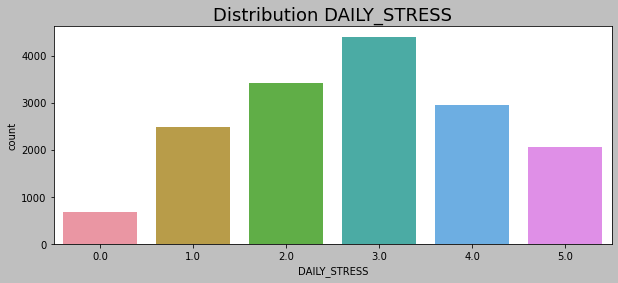

In [9]:
matplotlib.style.use('grayscale')

plt.figure(figsize=(10,4))
plt.title("Distribution DAILY_STRESS", fontsize = 18)
sns.countplot(x = data["DAILY_STRESS"])

The figure implies that the classes are heavily imbalanced, which provides an argument to merge certain classes together.

In [10]:
values_DS_old, counts_DS_old = np.unique(data["DAILY_STRESS"], return_counts = True)

In [11]:
print("There are", counts_DS_old[0], "occurrences of the value:", values_DS_old[0])
print("There are", counts_DS_old[1], "occurrences of the value:", values_DS_old[1])
print("There are", counts_DS_old[2], "occurrences of the value:", values_DS_old[2])
print("There are", counts_DS_old[3], "occurrences of the value:", values_DS_old[3])
print("There are", counts_DS_old[4], "occurrences of the value:", values_DS_old[4])
print("There are", counts_DS_old[5], "occurrences of the value:", values_DS_old[5])

There are 676 occurrences of the value: 0.0
There are 2478 occurrences of the value: 1.0
There are 3407 occurrences of the value: 2.0
There are 4398 occurrences of the value: 3.0
There are 2960 occurrences of the value: 4.0
There are 2052 occurrences of the value: 5.0


First, I will drop some of the columns which are irrelevant for my further findings.

In [12]:
data['YEAR'] = pd.DatetimeIndex(data['Timestamp']).year

In [13]:
data = data.drop(['Timestamp', 'WORK_LIFE_BALANCE_SCORE'], axis=1)

Next, I will recode some of the variables since these variables can be changed from a nominal value to a number which makes it easier to interpret in the further findings.

In [14]:
age_dict = {'Less than 20' : 1, '21 to 35' : 2, '36 to 50' : 3, '51 or more' : 4}
data['AGE'] = pd.Series([age_dict[x] for x in data.AGE], index=data.index)
gender_dict = {'Female' : 1, 'Male' : 0}
data['GENDER'] = pd.Series([gender_dict[x] for x in data.GENDER], index=data.index)
stress_dict = {0.0 : 1, 1.0 : 1, 2.0 : 2, 3.0 : 2, 4.0 : 3, 5.0 : 3}
data['DAILY_STRESS'] = pd.Series([stress_dict[x] for x in data.DAILY_STRESS], index=data.index)
data['DAILY_STRESS'] = data['DAILY_STRESS'].astype(int)

The dependent variable 'DAILY_STRESS' is merged into three classes instead of 6 classes. Furthermore the features 'GENDER' and 'AGE' are recoded for computational purposes.

## Step 4. Visualization

For the visualization part of the notebook, I will first look into how each of the individual features are correlated with one another. If it appears that there is multicollinearity between the various independent features, some features will be removed.

<AxesSubplot:title={'center':'Features correlation matrix'}>

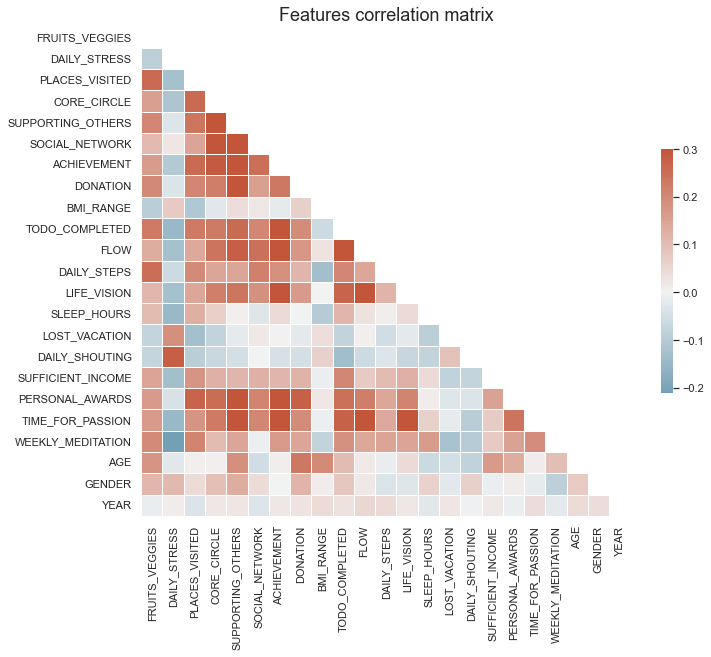

In [15]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Features correlation matrix", fontsize = 18)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Now the distribution of the dependent variable is reviewed, because I've recoded it into three classes. As can be seen, the classes are less imbalanced than before.

<AxesSubplot:title={'center':'Distribution DAILY_STRESS'}, xlabel='DAILY_STRESS', ylabel='count'>

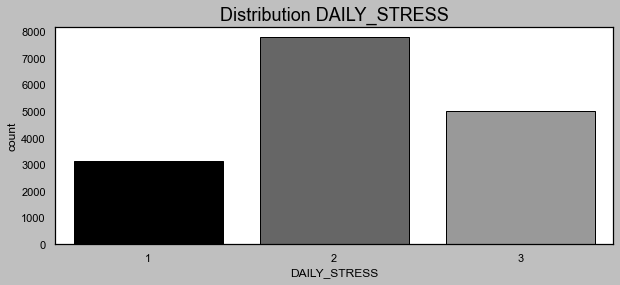

In [16]:
matplotlib.style.use('grayscale')

plt.figure(figsize=(10,4))
plt.title("Distribution DAILY_STRESS", fontsize = 18)
sns.countplot(x = data["DAILY_STRESS"])

In [17]:
values_DS_new, counts_DS_new = np.unique(data["DAILY_STRESS"], return_counts = True)

In [18]:
print("There are", counts_DS_new[0], "occurrences of the value:", values_DS_new[0])
print("There are", counts_DS_new[1], "occurrences of the value:", values_DS_new[1])
print("There are", counts_DS_new[2], "occurrences of the value:", values_DS_new[2])

There are 3154 occurrences of the value: 1
There are 7805 occurrences of the value: 2
There are 5012 occurrences of the value: 3


## Step 5. Analysis

### Base Model - Simple Linear Regression

First a base model is created, which is a Simple Linear Regression. This acts as a baseline which will be compared with the Ordinal Regression Models to see how the performance of these models compare to the baseline model.

In [19]:
import copy
from sklearn.model_selection import train_test_split
data_LR = copy.deepcopy(data)

X_LR = data_LR.drop(["DAILY_STRESS"], axis = 1)
Y_LR = data_LR ["DAILY_STRESS"]

X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_LR, Y_LR, random_state = 0, stratify = Y_LR)

In [20]:
from sklearn.linear_model import LinearRegression

modelLR = LinearRegression().fit(X_train_LR, y_train_LR)

In [21]:
pred_LR = modelLR.predict(X_test_LR)

pred_stress_LR = [int(np.round(x)) for x in pred_LR]

I've fitted the Linear Regression on the training data and subsequently predicted it on the test data. This is done for out-of-sample generalization.

Unfortunately, there is no python package for a very specific ordinal regression evaluation measure call the Closeness Evaluation Measure (CEM-ord), the confusion matrices of both y-true and y-pred are necessary to acquire this measure. See Amigó et al. (2020) An effectiveness metric for ordinal classification: Formal properties and experimental results for calculations.

In [22]:
from sklearn.metrics import confusion_matrix

cm_LR = confusion_matrix(y_test_LR, pred_stress_LR)
cm_LR

array([[  38,  738,   13],
       [  12, 1809,  130],
       [   4,  949,  300]], dtype=int64)

In [23]:
true_cm_LR = confusion_matrix(y_test_LR, y_test_LR)
true_cm_LR

array([[ 789,    0,    0],
       [   0, 1951,    0],
       [   0,    0, 1253]], dtype=int64)

In [24]:
prox11_LR = np.log((1/((true_cm_LR[0,0]/2)/(y_test_LR.size))))
prox12_LR = np.log((1/(((true_cm_LR[1,1]/2) + true_cm_LR[0,0])/(y_test_LR.size))))
prox13_LR = np.log((1/(((true_cm_LR[2,2]/2) + true_cm_LR[0,0] + true_cm_LR[1,1])/(y_test_LR.size))))

prox21_LR = np.log((1/(((true_cm_LR[0,0]/2) + true_cm_LR[1,1])/(y_test_LR.size))))
prox22_LR = np.log((1/((true_cm_LR[1,1]/2)/(y_test_LR.size))))
prox23_LR = np.log((1/(((true_cm_LR[2,2]/2) + true_cm_LR[1,1])/(y_test_LR.size))))

prox31_LR = np.log((1/(((true_cm_LR[0,0]/2) + true_cm_LR[1,1] + true_cm_LR[2,2])/(y_test_LR.size))))
prox32_LR = np.log((1/(((true_cm_LR[1,1]/2) + true_cm_LR[2,2])/(y_test_LR.size))))
prox33_LR = np.log((1/((true_cm_LR[2,2]/2)/(y_test_LR.size))))

In [25]:
proximity_LR = np.asarray([[prox11_LR, prox12_LR, prox13_LR],
                            [prox21_LR, prox22_LR, prox23_LR],
                            [prox31_LR, prox32_LR, prox33_LR]])

In [26]:
CEMord_LR = np.sum((cm_LR * proximity_LR)) / ((true_cm_LR[0,0] * prox11_LR) + (true_cm_LR[1,1] * prox22_LR) + 
                                              (true_cm_LR[2,2] * prox33_LR))

Now the Linear Regression is evaluated using the Cohen's kappa, Macro-averaged Mean Absolute Error (for ordinal regression), F1, Precision, Recall, Accuracy and MAE. These evaluation measures will be used for all used models. For the F1, Precision and Recall scores there are values per class instead of a general value.

In [27]:
from sklearn.metrics import cohen_kappa_score
from imblearn.metrics import macro_averaged_mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

print("Accuracy score LR: ", accuracy_score(y_test_LR, pred_stress_LR))
print("F1 score LR: ", f1_score(y_test_LR, pred_stress_LR, average = None))
print("Precision score LR: ", precision_score(y_test_LR, pred_stress_LR, average = None))
print("Recall score LR: ", recall_score(y_test_LR, pred_stress_LR, average = None))
print("Macro Averaged Mean Absolute Error LR: ", macro_averaged_mean_absolute_error(y_test_LR, pred_stress_LR))
print("Mean Absolute Error LR: ", mean_absolute_error(y_test_LR, pred_stress_LR))
print("Cohen's Kappa LR: ",cohen_kappa_score(y_test_LR, pred_stress_LR, weights = 'quadratic'))
print("Closeness Evaluation Measure LR: ", CEMord_LR)

Accuracy score LR:  0.5376909591785625
F1 score LR:  [0.09015421 0.66421884 0.35377358]
Precision score LR:  [0.7037037  0.51744851 0.6772009 ]
Recall score LR:  [0.04816223 0.92721681 0.23942538]
Macro Averaged Mean Absolute Error LR:  0.6016214897776123
Mean Absolute Error LR:  0.46656649135987976
Cohen's Kappa LR:  0.22526961866008122
Closeness Evaluation Measure LR:  0.6401955914905708


### Ordered Logit Model

The Ordered Logit Model is an extension to a Logistic Regression, but in this case it allow for more than 2 classes. Since the dependent variable is divided into three classes, this is a perfect model. Furthermore, it reviews the order of the classes of the dependent variable and shows in its output whether the model is able to correctly distinguish the classes.

https://analyticsindiamag.com/a-complete-tutorial-on-ordinal-regression-in-python/

In [28]:
data_OLM = copy.deepcopy(data)

Recode the classes into categories and order them.

In [29]:
stress_dict = {1 : 'Mild stress', 2: 'Moderate stress', 3: 'Severe stress'}
data_OLM['DAILY_STRESS'] = pd.Series([stress_dict[x] for x in data_OLM.DAILY_STRESS], index=data_OLM.index)

In [30]:
data_OLM['DAILY_STRESS'] = data_OLM['DAILY_STRESS'].astype("category")

In [31]:
data_OLM["DAILY_STRESS"] = data_OLM["DAILY_STRESS"].cat.set_categories(["Mild stress", "Moderate stress", "Severe stress"], ordered=True)

In [32]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

X_OLM = data_OLM.drop(["DAILY_STRESS"], axis = 1)
Y_OLM = data_OLM["DAILY_STRESS"]

X_train, X_test, y_train, y_test = train_test_split(X_OLM, Y_OLM, random_state = 0, stratify = Y_OLM)

model = OrderedModel(y_train, X_train, distr='logit')
model = model.fit(method = 'bfgs')
model.summary()

Optimization terminated successfully.
         Current function value: 0.932431
         Iterations: 59
         Function evaluations: 63
         Gradient evaluations: 63


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:           DAILY_STRESS   Log-Likelihood:                -11169.
Model:                   OrderedModel   AIC:                         2.239e+04
Method:            Maximum Likelihood   BIC:                         2.256e+04
Date:                Fri, 02 Dec 2022                                         
Time:                        16:54:46                                         
No. Observations:               11978                                         
Df Residuals:                   11954                                         
Df Model:                          24                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
FRUITS_VEGGIES                    0.0012      0.014      0.086      0.931      -0.026       0.028
PLACES_VISITED                   -0.0111      0.006     -1.807      0.071      -0.023       0.001
CORE_CIRCLE                      -0.0465      0.007     -6.418      0.000      -0.061      -0.032
SUPPORTING_OTHERS                 0.0291      0.007      4.228      0.000       0.016       0.043
SOCIAL_NETWORK                    0.0567      0.007      8.546      0.000       0.044       0.070
ACHIEVEMENT                      -0.0201      0.008     -2.519      0.012      -0.036      -0.004
DONATION                          0.0106      0.011      0.959      0.338      -0.011       0.032
BMI_RANGE                         0.1730      0.038      4.527      0.000       0.098       0.248
TODO_COMPLETED                   -0.0300      0.008     -3.785      0.000      -0.046      -0.014
FLOW                             -0.0604      0.009     -6.551      0.000      -0.078      -0.042
DAILY_STEPS                      -0.0029      0.007     -0.429      0.668      -0.016       0.010
LIFE_VISION                      -0.0249      0.006     -4.015      0.000      -0.037      -0.013
SLEEP_HOURS                      -0.1491      0.016     -9.370      0.000      -0.180      -0.118
LOST_VACATION                     0.0771      0.005     15.250      0.000       0.067       0.087
DAILY_SHOUTING                    0.1794      0.007     24.698      0.000       0.165       0.194
SUFFICIENT_INCOME                -0.3755      0.043     -8.750      0.000      -0.460      -0.291
PERSONAL_AWARDS                   0.0280      0.007      4.135      0.000       0.015       0.041
TIME_FOR_PASSION                 -0.0435      0.008     -5.402      0.000      -0.059      -0.028
WEEKLY_MEDITATION                -0.0865      0.007    -13.158      0.000      -0.099      -0.074
AGE                              -0.0004      0.021     -0.021      0.983      -0.042       0.041
GENDER                            0.3797      0.039      9.842      0.000       0.304       0.455
YEAR                              0.0187      0.010      1.859      0.063      -0.001       0.038
Mild stress/Moderate stress      34.8056     20.301      1.715      0.086      -4.983      74.594
Moderate stress/Severe stress     0.9356      0.012     79.769      0.000       0.913       0.959
=================================================================================================
"""

Keep the t values into a list for visualization purposes of feature importance. More later.

In [33]:
tvalues = model.tvalues[:22]
tvalues = abs(tvalues)
tvalues = tvalues.sort_values()
names = list(tvalues.index)

Feature importance shows us which features are important (every feature with significant results). These features are selected into the final OLM model.

In [34]:
Y_OLM_new = data_OLM['DAILY_STRESS']
X_OLM_new = data_OLM[['PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK',
                  'ACHIEVEMENT', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'LIFE_VISION',
                  'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
                  'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'GENDER']]

X_train_OLM, X_test_OLM, y_train_OLM, y_test_OLM = train_test_split(X_OLM_new, Y_OLM_new, random_state = 0, stratify = Y_OLM_new)

mod_logit = OrderedModel(y_train_OLM, X_train_OLM, distr='logit')

In [35]:
res_logit = mod_logit.fit(method='bfgs')
res_logit.summary()

Optimization terminated successfully.
         Current function value: 0.932621
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:           DAILY_STRESS   Log-Likelihood:                -11171.
Model:                   OrderedModel   AIC:                         2.238e+04
Method:            Maximum Likelihood   BIC:                         2.252e+04
Date:                Fri, 02 Dec 2022                                         
Time:                        16:54:51                                         
No. Observations:               11978                                         
Df Residuals:                   11959                                         
Df Model:                          19                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
PLACES_VISITED                   -0.0114      0.006     -1.894      0.058      -0.023       0.000
CORE_CIRCLE                      -0.0459      0.007     -6.354      0.000      -0.060      -0.032
SUPPORTING_OTHERS                 0.0308      0.007      4.644      0.000       0.018       0.044
SOCIAL_NETWORK                    0.0554      0.007      8.526      0.000       0.043       0.068
ACHIEVEMENT                      -0.0197      0.008     -2.486      0.013      -0.035      -0.004
BMI_RANGE                         0.1799      0.037      4.860      0.000       0.107       0.252
TODO_COMPLETED                   -0.0296      0.008     -3.764      0.000      -0.045      -0.014
FLOW                             -0.0598      0.009     -6.495      0.000      -0.078      -0.042
LIFE_VISION                      -0.0247      0.006     -3.992      0.000      -0.037      -0.013
SLEEP_HOURS                      -0.1504      0.016     -9.509      0.000      -0.181      -0.119
LOST_VACATION                     0.0773      0.005     15.314      0.000       0.067       0.087
DAILY_SHOUTING                    0.1790      0.007     24.753      0.000       0.165       0.193
SUFFICIENT_INCOME                -0.3720      0.042     -8.785      0.000      -0.455      -0.289
PERSONAL_AWARDS                   0.0284      0.007      4.243      0.000       0.015       0.042
TIME_FOR_PASSION                 -0.0430      0.008     -5.358      0.000      -0.059      -0.027
WEEKLY_MEDITATION                -0.0865      0.006    -13.356      0.000      -0.099      -0.074
GENDER                            0.3861      0.038     10.128      0.000       0.311       0.461
Mild stress/Moderate stress      -2.9221      0.157    -18.560      0.000      -3.231      -2.614
Moderate stress/Severe stress     0.9353      0.012     79.743      0.000       0.912       0.958
=================================================================================================
"""

In [36]:
predicted = res_logit.model.predict(res_logit.params, exog=X_test_OLM)
predicted

C:\Users\youri\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


array([[0.22741037, 0.56260399, 0.20998564],
       [0.30609145, 0.54326309, 0.15064547],
       [0.12467229, 0.52077673, 0.35455098],
       ...,
       [0.09816952, 0.48365628, 0.4181742 ],
       [0.2118057 , 0.56269972, 0.22549458],
       [0.2730365 , 0.55456641, 0.17239708]])

After prediction, the values 'mild stress', 'moderate stress' and 'severe stress' of the y_test are recoded back into numbers, for which a confusion matrix can be made.

In [37]:
y_test_OLM = y_test_OLM.cat.set_categories(["Mild stress", "Moderate stress", "Severe stress"], ordered=False)
y_test_OLM = y_test_OLM.astype('str')

In [38]:
pred_stress_OLM = predicted.argmax(1)
y_test_OLM_new = []

for values in y_test_OLM:
    if values == "Mild stress":
        y_test_OLM_new.append(0)
    elif values == "Moderate stress":
        y_test_OLM_new.append(1)
    else:
        y_test_OLM_new.append(2)
        
y_test_OLM_new = np.array(y_test_OLM_new)

Confusion matrix of the OLM, also for calculation of the CEM-ord.

In [39]:
cm_OLM = confusion_matrix(y_test_OLM_new, pred_stress_OLM)
cm_OLM

array([[ 116,  633,   40],
       [  67, 1573,  311],
       [  17,  764,  472]], dtype=int64)

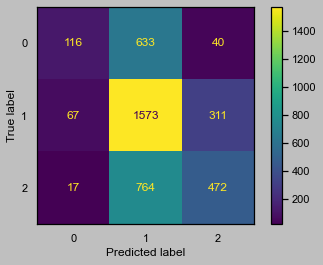

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm_OLM).plot()
plt.show()

In [41]:
true_cm_OLM = confusion_matrix(y_test_OLM_new, y_test_OLM_new)
true_cm_OLM

array([[ 789,    0,    0],
       [   0, 1951,    0],
       [   0,    0, 1253]], dtype=int64)

In [42]:
prox11_OLM = np.log((1/((true_cm_OLM[0,0]/2)/(y_test_OLM_new.size))))
prox12_OLM = np.log((1/(((true_cm_OLM[1,1]/2) + true_cm_OLM[0,0])/(y_test_OLM_new.size))))
prox13_OLM = np.log((1/(((true_cm_OLM[2,2]/2) + true_cm_OLM[0,0] + true_cm_OLM[1,1])/(y_test_OLM_new.size))))

prox21_OLM = np.log((1/(((true_cm_OLM[0,0]/2) + true_cm_OLM[1,1])/(y_test_OLM_new.size))))
prox22_OLM = np.log((1/((true_cm_OLM[1,1]/2)/(y_test_OLM_new.size))))
prox23_OLM = np.log((1/(((true_cm_OLM[2,2]/2) + true_cm_OLM[1,1])/(y_test_OLM_new.size))))

prox31_OLM = np.log((1/(((true_cm_OLM[0,0]/2) + true_cm_OLM[1,1] + true_cm_OLM[2,2])/(y_test_OLM_new.size))))
prox32_OLM = np.log((1/(((true_cm_OLM[1,1]/2) + true_cm_OLM[2,2])/(y_test_OLM_new.size))))
prox33_OLM = np.log((1/((true_cm_OLM[2,2]/2)/(y_test_OLM_new.size))))

In [43]:
proximity_OLM = np.asarray([[prox11_OLM, prox12_OLM, prox13_OLM],
                            [prox21_OLM, prox22_OLM, prox23_OLM],
                            [prox31_OLM, prox32_OLM, prox33_OLM]])

In [44]:
CEMord_OLM = np.sum((cm_OLM * proximity_OLM)) / ((true_cm_OLM[0,0] * prox11_OLM) + (true_cm_OLM[1,1] * prox22_OLM) + 
                                              (true_cm_OLM[2,2] * prox33_OLM))

Evaluation and error metrics of the Ordered Logit Model.

In [45]:
print("Accuracy score OLM: ", accuracy_score(y_test_OLM_new, pred_stress_OLM))
print("F1 score OLM: ", f1_score(y_test_OLM_new, pred_stress_OLM, average = None))
print("Precision score OLM: ", precision_score(y_test_OLM_new, pred_stress_OLM, average = None))
print("Recall score OLM: ", recall_score(y_test_OLM_new, pred_stress_OLM, average = None)) 
print("Macro Averaged Mean Absolute Error OLM: ", macro_averaged_mean_absolute_error(y_test_OLM_new, pred_stress_OLM))
print("Mean Absolute Error OLM: ", mean_absolute_error(y_test_OLM_new, pred_stress_OLM))
print("Cohen's Kappa OLM: ",cohen_kappa_score(y_test_OLM_new, pred_stress_OLM, weights = 'quadratic'))
print("Closeness Evaluation Measure OLM: ", CEMord_OLM)

Accuracy score OLM:  0.5411970949161031
F1 score OLM:  [0.23458038 0.63930096 0.45472062]
Precision score OLM:  [0.58       0.52962963 0.57351154]
Recall score OLM:  [0.14702155 0.8062532  0.37669593]
Macro Averaged Mean Absolute Error OLM:  0.5780979478503411
Mean Absolute Error OLM:  0.4730778863010268
Cohen's Kappa OLM:  0.3140905702985687
Closeness Evaluation Measure OLM:  0.6528558704308005


### Support Vector Regression

A Support Vector Regression is able to handle both linear and non-linear kernels, which is especially useful for ordinal regression.

https://analyticsindiamag.com/feature-selection-using-svm-and-model-building/

In [46]:
data_SVR = copy.deepcopy(data)

In [47]:
from sklearn.svm import SVR

X = data_SVR.drop(["DAILY_STRESS"], axis = 1)
Y = data_SVR["DAILY_STRESS"]

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 0, stratify = Y)

modelSVR = SVR(kernel = 'poly', gamma = 'scale').fit(X_train, y_train)

I use both the 'poly' kernel and the 'scale' gamma, because finding hyperparameters for these values are computationally time consuming, whilst the added value is only limited.

Feature selection technique called permutation importance, which measures feature importance but can correct for the feature importance bias. After finding the most important features, the features are saved into a list along with it's importance into another list. This list is subsequently used as input features for the final SVR model.

In [127]:
from sklearn.inspection import permutation_importance

scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
r_multi_SVR = permutation_importance(modelSVR, X_test, y_test, n_repeats=30, random_state=0, scoring=scoring)

feature_list_SVR = []
feature_importance_SVR = []
for metric in r_multi_SVR:
    r = r_multi_SVR[metric]
    for i in r.importances_mean.argsort()[::-1]:
        if X.columns[i] in feature_list_SVR:
            continue
        else:
            feature_list_SVR.append(X.columns[i])
            feature_importance_SVR.append((1 - (1-r.importances_mean[i]*(len(Y)-1)/(len(Y)-X.shape[1]-1))))

In [128]:
X_SVR = data_SVR[feature_list_SVR]
Y_SVR = data_SVR['DAILY_STRESS']

#### Hyperparameter Tuning

Using the final data, the best hyperparameters will be used. The C value and Epsilon values will be tuned using the GridSearchCV with 3-fold cross validation.

In [55]:
from sklearn.model_selection import RandomizedSearchCV

# Value of regularization parameter
C = [float(x) for x in np.round(np.linspace(start = 0.0, stop = 600, num = 25))]
# Value of epsilon (error)
epsilon = [float(x) for x in np.linspace(start = 0.0, stop = 4.0, num = 25)]

random_grid_SVR = {'C': C,
               'epsilon': epsilon}
print(random_grid_SVR)

{'C': [0.0, 25.0, 50.0, 75.0, 100.0, 125.0, 150.0, 175.0, 200.0, 225.0, 250.0, 275.0, 300.0, 325.0, 350.0, 375.0, 400.0, 425.0, 450.0, 475.0, 500.0, 525.0, 550.0, 575.0, 600.0], 'epsilon': [0.0, 0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 1.0, 1.1666666666666665, 1.3333333333333333, 1.5, 1.6666666666666665, 1.8333333333333333, 2.0, 2.1666666666666665, 2.333333333333333, 2.5, 2.6666666666666665, 2.833333333333333, 3.0, 3.1666666666666665, 3.333333333333333, 3.5, 3.6666666666666665, 3.833333333333333, 4.0]}


In [56]:
from sklearn.model_selection import GridSearchCV

X_train_SVR, X_test_SVR, y_train_SVR, y_test_SVR = train_test_split(X_SVR, Y_SVR, random_state = 0, stratify = Y_SVR)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
svr = SVR(kernel = 'poly', gamma = 'scale')
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
SVR_random = GridSearchCV(estimator = svr, param_grid = random_grid_SVR, cv = 3, verbose=1, n_jobs = -1)
# Fit the random search model
SVR_random.fit(X_train_SVR, y_train_SVR)

Fitting 3 folds for each of 625 candidates, totalling 1875 fits


C:\Users\youri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 1875.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\youri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\youri\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\youri\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 333, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx

GridSearchCV(cv=3, estimator=SVR(kernel='poly'), n_jobs=-1,
             param_grid={'C': [0.0, 25.0, 50.0, 75.0, 100.0, 125.0, 150.0,
                               175.0, 200.0, 225.0, 250.0, 275.0, 300.0, 325.0,
                               350.0, 375.0, 400.0, 425.0, 450.0, 475.0, 500.0,
                               525.0, 550.0, 575.0, 600.0],
                         'epsilon': [0.0, 0.16666666666666666,
                                     0.3333333333333333, 0.5,
                                     0.6666666666666666, 0.8333333333333333,
                                     1.0, 1.1666666666666665,
                                     1.3333333333333333, 1.5,
                                     1.6666666666666665, 1.8333333333333333,
                                     2.0, 2.1666666666666665, 2.333333333333333,
                                     2.5, 2.6666666666666665, 2.833333333333333,
                                     3.0, 3.1666666666666665, 3.333333333333333,
                                     3.5, 3.6666666666666665, 3.833333333333333,
                                     4.0]},
             verbose=1)

In [57]:
params_SVR = SVR_random.best_params_
params_SVR

{'C': 600.0, 'epsilon': 0.16666666666666666}

The grid search finds that for Epsilon 0.16666666666666666 is the ideal value, and for C 600.0 is the ideal value.

In [62]:
fmodel_SVR = SVR(kernel = 'poly',
               gamma = 'scale',
               C = 600.0,
              epsilon = 0.16666666666666666)
fmodel_SVR.fit(X_train_SVR, y_train_SVR)

pred_SVR = fmodel_SVR.predict(X_test_SVR)

pred_stress_SVR = [int(np.round(x)) for x in pred_SVR]

In [63]:
np.unique(pred_stress_SVR, return_counts = True)

(array([1, 2, 3]), array([  40, 3521,  432], dtype=int64))

Confusion matrix for y-test and y-pred of the SVR are made. Also for CEM-ord computation.

In [64]:
cm_SVR = confusion_matrix(y_test_SVR, pred_stress_SVR)
cm_SVR

array([[  29,  746,   14],
       [   9, 1813,  129],
       [   2,  962,  289]], dtype=int64)

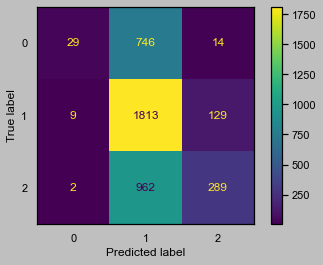

In [65]:
ConfusionMatrixDisplay(cm_SVR).plot()
plt.show()

In [66]:
true_cm_SVR = confusion_matrix(y_test_SVR, y_test_SVR)
true_cm_SVR

array([[ 789,    0,    0],
       [   0, 1951,    0],
       [   0,    0, 1253]], dtype=int64)

In [67]:
prox11_SVR = np.log((1/((true_cm_SVR[0,0]/2)/(y_test_SVR.size))))
prox12_SVR = np.log((1/(((true_cm_SVR[1,1]/2) + true_cm_SVR[0,0])/(y_test_SVR.size))))
prox13_SVR = np.log((1/(((true_cm_SVR[2,2]/2) + true_cm_SVR[0,0] + true_cm_SVR[1,1])/(y_test_SVR.size))))

prox21_SVR = np.log((1/(((true_cm_SVR[0,0]/2) + true_cm_SVR[1,1])/(y_test_SVR.size))))
prox22_SVR = np.log((1/((true_cm_SVR[1,1]/2)/(y_test_SVR.size))))
prox23_SVR = np.log((1/(((true_cm_SVR[2,2]/2) + true_cm_SVR[1,1])/(y_test_SVR.size))))

prox31_SVR = np.log((1/(((true_cm_SVR[0,0]/2) + true_cm_SVR[1,1] + true_cm_SVR[2,2])/(y_test_SVR.size))))
prox32_SVR = np.log((1/(((true_cm_SVR[1,1]/2) + true_cm_SVR[2,2])/(y_test_SVR.size))))
prox33_SVR = np.log((1/((true_cm_SVR[2,2]/2)/(y_test_SVR.size))))

In [68]:
proximity_SVR = np.asarray([[prox11_SVR, prox12_SVR, prox13_SVR],
                            [prox21_SVR, prox22_SVR, prox23_SVR],
                            [prox31_SVR, prox32_SVR, prox33_SVR]])

In [69]:
CEMord_SVR = np.sum((cm_SVR * proximity_SVR)) / ((true_cm_SVR[0,0] * prox11_SVR) + (true_cm_SVR[1,1] * prox22_SVR) + 
                                              (true_cm_SVR[2,2] * prox33_SVR))

Evaluation and error metrics for the Support Vector Regression.

In [70]:
print("Accuracy score SVR: ", accuracy_score(y_test_SVR, pred_stress_SVR))
print("F1 score SVR: ", f1_score(y_test_SVR, pred_stress_SVR, average = None))
print("Precision score SVR: ", precision_score(y_test_SVR, pred_stress_SVR, average = None))
print("Recall score SVR: ", recall_score(y_test_SVR, pred_stress_SVR, average = None)) 
print("Macro Averaged Mean Absolute Error SVR: ", macro_averaged_mean_absolute_error(y_test_SVR, pred_stress_SVR))
print("Mean Absolute Error SVR: ", mean_absolute_error(y_test_SVR, pred_stress_SVR))
print("Cohen's Kappa SVR: ",cohen_kappa_score(y_test_SVR, pred_stress_SVR, weights = 'quadratic'))
print("Closeness Evaluation Measure SVR: ", CEMord_SVR)

Accuracy score SVR:  0.5336839469070874
F1 score SVR:  [0.06996381 0.6626462  0.34302671]
Precision score SVR:  [0.725      0.51491054 0.66898148]
Recall score SVR:  [0.03675539 0.92926704 0.23064645]
Macro Averaged Mean Absolute Error SVR:  0.6075570904279995
Mean Absolute Error SVR:  0.47032306536438767
Cohen's Kappa SVR:  0.2116873561830711
Closeness Evaluation Measure SVR:  0.6367846065879692


### Random Forest Regression

A Random Forest Regressor is a very adequate technique for non-linear data. Next to that it corrects for overfitting of decision trees because it uses multiple decision trees and has both overfitting as well as underfitting decision trees in its forest.

In [71]:
data_RF = copy.deepcopy(data)

In [72]:
from sklearn.ensemble import RandomForestRegressor

X = data_RF.drop(["DAILY_STRESS"], axis = 1)
Y = data_RF["DAILY_STRESS"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0, stratify = Y)

modelRF= RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train, y_train)

Permutation importance for feature selection of most important features.

In [73]:
from sklearn.inspection import permutation_importance

scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
r_multi_RF = permutation_importance(modelRF, X_test, y_test, n_repeats=30, random_state=0, scoring=scoring)

feature_list_RF = []
feature_importance_RF = []
for metric in r_multi_RF:
    r = r_multi_RF[metric]
    for i in r.importances_mean.argsort()[::-1]:
        if (1 - (1-r.importances_mean[i]*(len(Y)-1)/(len(Y)-X.shape[1]-1))) > 0.010:
            if X.columns[i] in feature_list_RF:
                continue
            else:
                feature_list_RF.append(X.columns[i])
                feature_importance_RF.append((1 - (1-r.importances_mean[i]*(len(Y)-1)/(len(Y)-X.shape[1]-1))))

In [74]:
X_RF = data_RF[feature_list_RF]
Y_RF = data_RF['DAILY_STRESS']

##### Hyperparameter Tuning
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

Hyperparameter tuning using RandomizedSearchCV with 100 iterations and 3-fold cross validation. Here RandomizedSearchCV is used because the amount of different hyperparameters and it's possible combinations make a GridSearchCV computationally time-consuming.

In [75]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid_RF = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid_RF)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [76]:
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X_RF, Y_RF, random_state = 0, stratify = Y_RF)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid_RF, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_RF, y_train_RF)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, verbose=2)

In [77]:
params_RF = rf_random.best_params_
params_RF

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40}

In [87]:
modelRF_random = RandomForestRegressor(n_estimators = 1000, min_samples_split = 2,
                               min_samples_leaf = 1, max_features = 'sqrt',
                               max_depth = 40, random_state = 0).fit(X_train_RF, y_train_RF)

pred_RF = modelRF_random.predict(X_test_RF)

pred_stress_RF = [int(np.round(x)) for x in pred_RF]

Confusion matrix for calculation of CEM-ord.

In [88]:
cm_RF = confusion_matrix(y_test_RF, pred_stress_RF)
cm_RF

array([[ 108,  675,    6],
       [  18, 1825,  108],
       [   4,  959,  290]], dtype=int64)

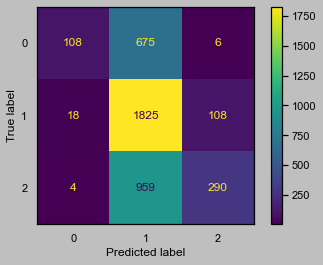

In [89]:
ConfusionMatrixDisplay(cm_RF).plot()
plt.show()

In [90]:
true_cm_RF = confusion_matrix(y_test_RF, y_test_RF)
true_cm_RF

array([[ 789,    0,    0],
       [   0, 1951,    0],
       [   0,    0, 1253]], dtype=int64)

In [91]:
prox11_RF = np.log((1/((true_cm_RF[0,0]/2)/(y_test_RF.size))))
prox12_RF = np.log((1/(((true_cm_RF[1,1]/2) + true_cm_RF[0,0])/(y_test_RF.size))))
prox13_RF = np.log((1/(((true_cm_RF[2,2]/2) + true_cm_RF[0,0] + true_cm_RF[1,1])/(y_test_RF.size))))

prox21_RF = np.log((1/(((true_cm_RF[0,0]/2) + true_cm_RF[1,1])/(y_test_RF.size))))
prox22_RF = np.log((1/((true_cm_RF[1,1]/2)/(y_test_RF.size))))
prox23_RF = np.log((1/(((true_cm_RF[2,2]/2) + true_cm_RF[1,1])/(y_test_RF.size))))

prox31_RF = np.log((1/(((true_cm_RF[0,0]/2) + true_cm_RF[1,1] + true_cm_RF[2,2])/(y_test_RF.size))))
prox32_RF = np.log((1/(((true_cm_RF[1,1]/2) + true_cm_RF[2,2])/(y_test_RF.size))))
prox33_RF = np.log((1/((true_cm_RF[2,2]/2)/(y_test_RF.size))))

In [92]:
proximity_RF = np.asarray([[prox11_RF, prox12_RF, prox13_RF],
                            [prox21_RF, prox22_RF, prox23_RF],
                            [prox31_RF, prox32_RF, prox33_RF]])

In [93]:
CEMord_RF = np.sum((cm_RF * proximity_RF)) / ((true_cm_RF[0,0] * prox11_RF) + (true_cm_RF[1,1] * prox22_RF) + 
                                              (true_cm_RF[2,2] * prox33_RF))

Evaluation and error metrics of the RF model.

In [94]:
print("Accuracy score RF: ", accuracy_score(y_test_RF, pred_stress_RF))
print("F1 score RF: ", f1_score(y_test_RF, pred_stress_RF, average = None))
print("Precision score RF: ", precision_score(y_test_RF, pred_stress_RF, average = None))
print("Recall score RF: ", recall_score(y_test_RF, pred_stress_RF, average = None)) 
print("Macro Averaged Mean Absolute Error RF: ", macro_averaged_mean_absolute_error(y_test_RF, pred_stress_RF))
print("Mean Absolute Error RF: ", mean_absolute_error(y_test_RF, pred_stress_RF))
print("Cohen's Kappa RF: ",cohen_kappa_score(y_test_RF, pred_stress_RF, weights = 'quadratic'))
print("Closeness Evaluation Measure RF: ", CEMord_RF)

Accuracy score RF:  0.5567242674680691
F1 score RF:  [0.23503808 0.67467652 0.35003018]
Precision score RF:  [0.83076923 0.52760914 0.71782178]
Recall score RF:  [0.13688213 0.93541773 0.23144453]
Macro Averaged Mean Absolute Error RF:  0.5690175014107679
Mean Absolute Error RF:  0.4457801152016028
Cohen's Kappa RF:  0.28353092039471695
Closeness Evaluation Measure RF:  0.6565520339180142


### Post Hoc Analysis

Models indicate a very strong importance of the feature "DAILY_SHOUTING". Furthermore, the Linear Regression does not predict that much worse than the Ordinal Regression Models. This gives reason to believe that most of the explained variance in the models is due to the "DAILY_SHOUTING" feature. To check, whether this is true, the Linear Regression is performed again, but this time solely the "DAILY_SHOUTING" feature is used as predictive feature.

In [95]:
import copy
from sklearn.model_selection import train_test_split
data_PH = copy.deepcopy(data)

X_PH = data_PH["DAILY_SHOUTING"]
X_PH = np.asarray(X_PH).reshape(-1,1)
Y_PH = data_PH["DAILY_STRESS"]

X_train_PH, X_test_PH, y_train_PH, y_test_PH = train_test_split(X_PH, Y_PH, random_state = 0, stratify = X_PH)

In [96]:
modelPH = LinearRegression().fit(X_train_PH, y_train_PH)

In [97]:
pred_PH = modelPH.predict(X_test_PH)

pred_stress_PH = [int(np.round(x)) for x in pred_PH]
print('Fraction of correct stress predictions')
print((np.asarray(y_test_PH.values) == pred_stress_PH).mean())

Fraction of correct stress predictions
0.499373904332582


Using the "DAILY_SHOUTING" as feature alone is already a very strong predictor of "DAILY_STRESS".

<AxesSubplot:xlabel='DAILY_SHOUTING', ylabel='DAILY_STRESS'>

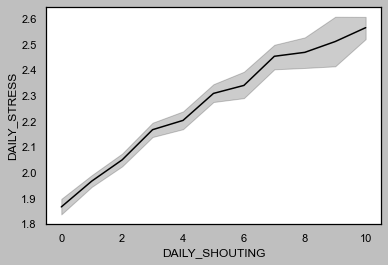

In [98]:
X_PH = data_PH["DAILY_SHOUTING"]
sns.lineplot(x = X_PH, y = Y_PH)

There is possibly a strong linear relationship between "DAILY_SHOUTING" and "DAILY_STRESS". This is not surprising considering the predictive value of the baseline model Linear Regression.

<BarContainer object of 22 artists>

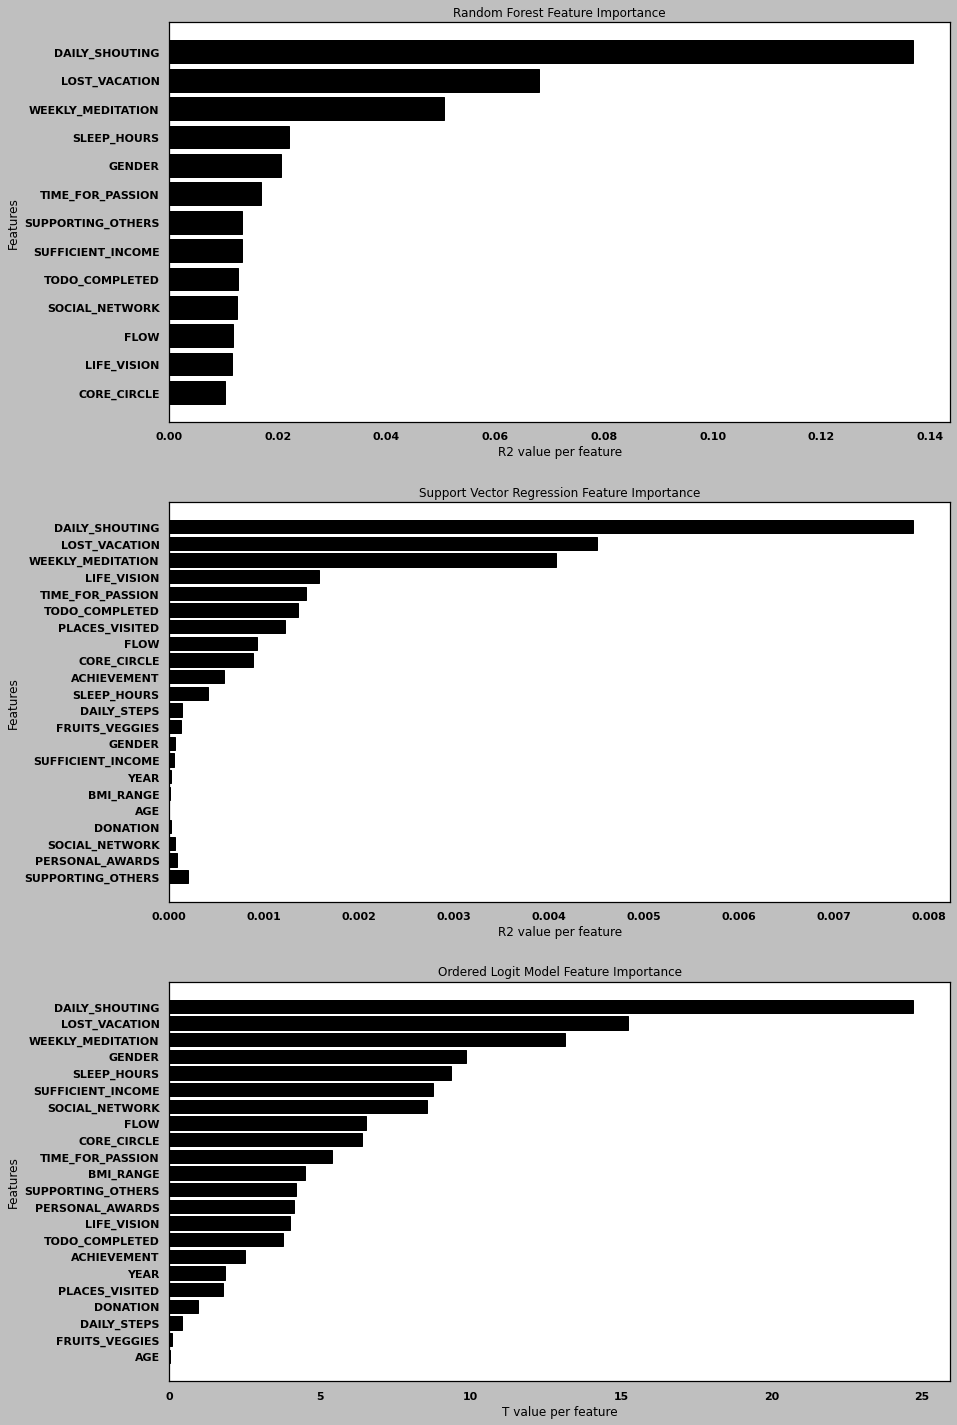

In [133]:
fig, ax = plt.subplots(3,1, figsize = (14,25))

matplotlib.style.use('grayscale')

ax[0].set_title("Random Forest Feature Importance")
ax[0].set_xlabel("R2 value per feature")
ax[0].set_ylabel("Features")
ax[0].barh(y = np.flip(feature_list_RF), width = np.flip(feature_importance_RF))

ax[1].set_title("Support Vector Regression Feature Importance")
ax[1].set_xlabel("R2 value per feature")
ax[1].set_ylabel("Features")
ax[1].barh(y = np.flip(feature_list_SVR), width = np.flip(np.abs(feature_importance_SVR)))

ax[2].set_title("Ordered Logit Model Feature Importance")
ax[2].set_xlabel("T value per feature")
ax[2].set_ylabel("Features")
ax[2].barh(y = names, width = tvalues)

Feature importance plot of each model shows that most models have the same variables as important, which means that the feature selection went well.

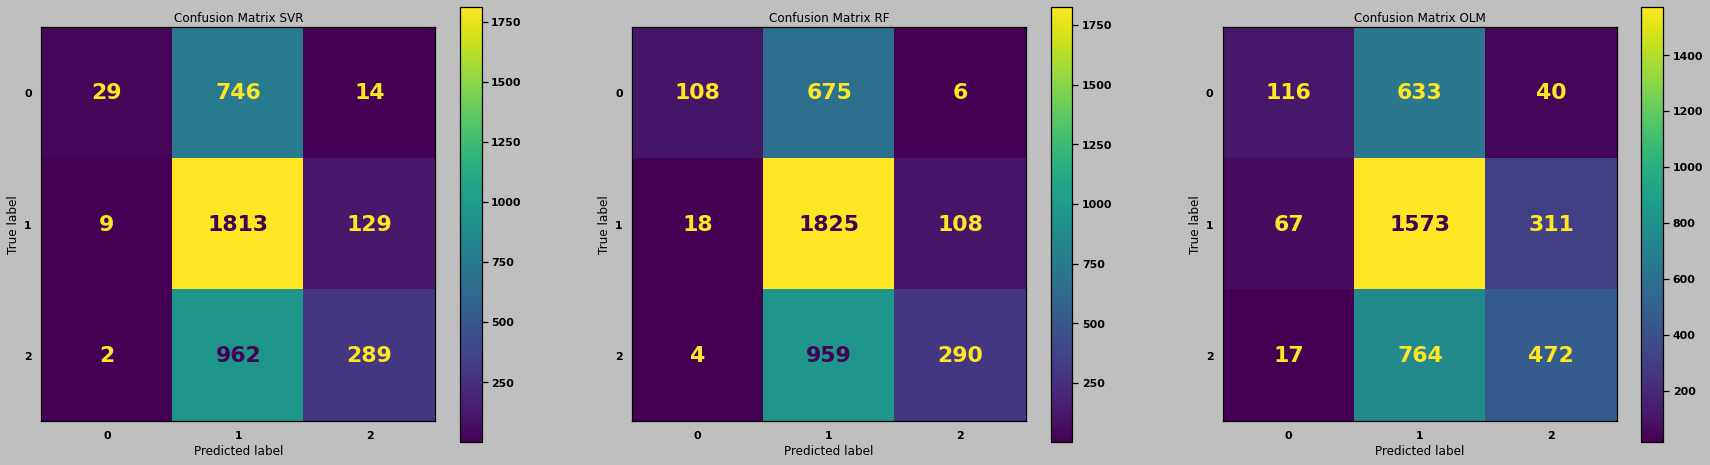

In [126]:
fig, ax = plt.subplots(1,3, figsize = (30,8))

font = {'family' : 'DejaVu Sans',
    'weight' : 'bold',
    'size'   : 22}
plt.rc('font', **font)

ax[0].set_title("Confusion Matrix SVR")
ax[1].set_title("Confusion Matrix RF")
ax[2].set_title("Confusion Matrix OLM")
ConfusionMatrixDisplay(cm_SVR).plot(ax=ax[0])
ConfusionMatrixDisplay(cm_RF).plot(ax=ax[1])
ConfusionMatrixDisplay(cm_OLM).plot(ax=ax[2])